In [44]:
import pandas as pd
import mysql.connector
import os
import numpy as np

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_items'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Umesh@730',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Acer/Coding Python/ECommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state            

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector

db = mysql.connector.connect(host="localhost",
                             username="root",
                             password="Umesh@730",
                             database="ecommerce")


cur = db.cursor()



# List all unique cities where customers are located.

In [20]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [15]:
query = """ SELECT 
    COUNT(order_id)
FROM
    orders
WHERE
    YEAR(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"Number of Total orders placed is:", data[0][0]

('Number of Total orders placed is:', 45101)

# Find the total sales per category.


In [16]:
query = """ SELECT 
    ROUND(SUM(p.payment_value), 2) sales,
    pr.product_category category
FROM
    products AS pr
        JOIN
    order_items AS o ON pr.product_id = o.product_id
        JOIN
    payments AS p ON p.order_id = o.order_id
GROUP BY category """

cur.execute(query)

data = cur.fetchall()

data

[(506738.66, 'perfumery'),
 (1430176.39, 'Furniture Decoration'),
 (486882.05, 'telephony'),
 (1712553.67, 'bed table bath'),
 (852294.33, 'automotive'),
 (1585330.45, 'computer accessories'),
 (1094758.13, 'housewares'),
 (539845.66, 'babies'),
 (619037.69, 'toys'),
 (646826.49, 'Furniture office'),
 (779698.0, 'Cool Stuff'),
 (1657373.12, 'HEALTH BEAUTY'),
 (311268.97, 'pet Shop'),
 (64694.76, 'General Interest Books'),
 (317440.07, 'stationary store'),
 (1429216.68, 'Watches present'),
 (279121.55, 'PCs'),
 (91170.66, 'climatization'),
 (241475.63, 'Construction Tools Construction'),
 (1392127.56, 'sport leisure'),
 (187151.29, 'Bags Accessories'),
 (259857.1, 'electronics'),
 (136645.29, 'Casa Construcao'),
 (195480.38, 'Games consoles'),
 (218158.28, 'Fashion Bags and Accessories'),
 (95532.27, 'home appliances'),
 (838280.75, 'Garden tools'),
 (118730.61, 'Agro Industria e Comercio'),
 (252801.71, None),
 (60324.62, 'audio'),
 (24915.44, 'technical books'),
 (42394.41, 'Construct

# Calculate the percentage of orders that were paid in installments.


In [17]:
query = """ SELECT 
   (SUM(CASE
        WHEN payment_installments >= 1 THEN 1
        ELSE 0
    END) / COUNT(*)) * 100 Installment_percentage
FROM
    payments; """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 


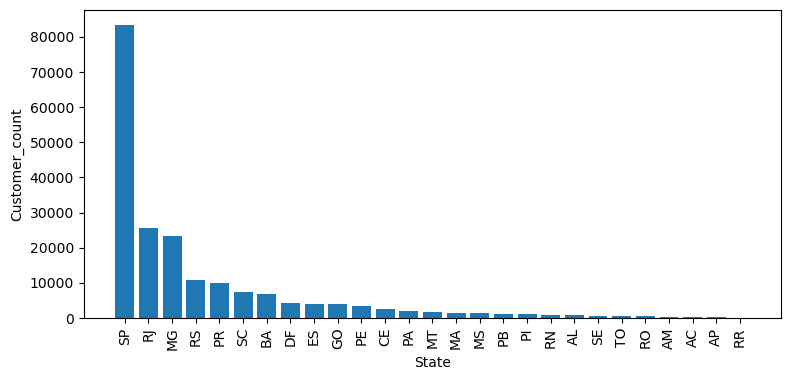

,Customer_count,State
0,83492,SP
4,25704,RJ
2,23270,MG
5,10932,RS
3,10090,PR
1,7274,SC
9,6760,BA
13,4280,DF
8,4066,ES
7,4040,GO


In [30]:
query = """ SELECT DISTINCT
    COUNT(customer_id) Customer_no, customer_state State
FROM
    customers
GROUP BY customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer_count","State"])
df = df.sort_values(by = "Customer_count", ascending = False)
plt.figure(figsize = (9,4))
plt.bar(df["State"], df["Customer_count"])
plt.xlabel("State")
plt.ylabel("Customer_count")
plt.xticks(rotation = 90)
plt.show()

df

# Calculate the number of orders per month in 2018.


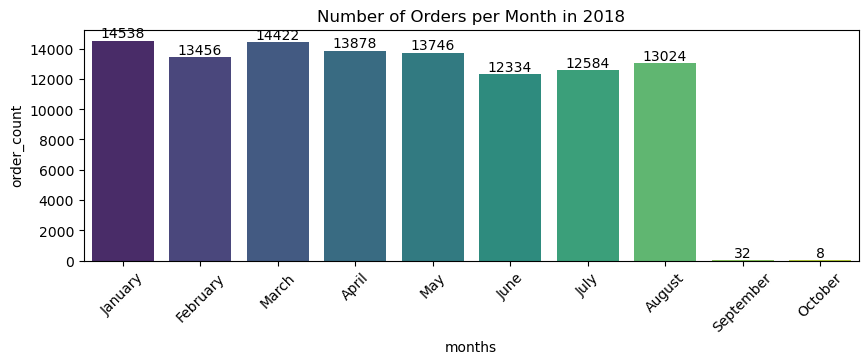

In [55]:
query = """ SELECT 
    MONTHNAME(order_purchase_timestamp) months,
    COUNT(order_id) number_of_order
FROM
    orders
WHERE
    YEAR(order_purchase_timestamp) = 2018
GROUP BY months """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","October"]

plt.figure(figsize = (10,3))
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, palette = "viridis")
plt.title("Number of Orders per Month in 2018")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.show()

# Find the average number of products per order, grouped by customer city.


In [41]:
query = """ with count_per_order as 
(select o.order_id, o.customer_id, count(oi.order_id) as oc
from orders as o join order_items as oi
on o.order_id = oi.order_id
group by o.order_id, o.customer_id)

select c.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers as c join count_per_order
on c.customer_id = count_per_order.customer_id
group by c.customer_city; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer_cities","average_product_per_order"])

df.head(10)

,customer_cities,average_product_per_order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# Calculate the percentage of total revenue contributed by each product category.


In [42]:
query = """ SELECT 
    UPPER(pr.product_category) category,
    ROUND((SUM(p.payment_value) / (SELECT 
                    SUM(payment_value)
                FROM
                    payments) * 100),
            2) sales_percentage
FROM
    products AS pr
        JOIN
    order_items AS o ON pr.product_id = o.product_id
        JOIN
    payments AS p ON p.order_id = o.order_id
GROUP BY category
ORDER BY sales_percentage DESC; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Product_category","Sales_percentage"])

df.head(10)

,Product_category,Sales_percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.


In [50]:
query = """ SELECT 
    p.product_category,
    COUNT(oi.product_id),
    ROUND(AVG(oi.price), 2)
FROM
    products AS p
        JOIN
    order_items AS oi ON p.product_id = oi.product_id
GROUP BY p.product_category; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Product_category","count_of_products", "average_price"])

arr1 = df["count_of_products"]
arr2 = df["average_price"]

a = np.corrcoef([arr1,arr2])
print("The Correlation between product price and the number of times a product has been purchased is", a[0][-1])

The Correlation between product price and the number of times a product has been purchased is -0.10631514167157562


In [ ]:
#hence we can say that from this obtained result, there is no correlation between Product Price and Number of times a product that has been purchase.

# Calculate the total revenue generated by each seller, and rank them by revenue.


In [52]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from (SELECT
    oi.seller_id,
    round(sum(p.payment_value),2) revenue
FROM
    order_items AS oi
        JOIN
    payments AS p ON oi.order_id = p.order_id
GROUP BY oi.seller_id) as a """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])

df.head(10)

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,2028667.63,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,1232888.16,2
2,4a3ca9315b744ce9f8e9374361493884,1204981.08,3
3,1f50f920176fa81dab994f9023523100,1161013.68,4
4,53243585a1d6dc2643021fd1853d8905,1139612.32,5
5,da8622b14eb17ae2831f4ac5b9dab84a,1088877.28,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,1056664.48,7
7,955fee9216a65b617aa5c0531780ce60,945289.20,8
8,fa1c13f2614d7b5c4749cbc52fecda94,826052.92,9
9,7e93a43ef30c4f03f38b393420bc753a,740536.84,10


# Calculate the moving average of order values for each customer over their order history.


In [61]:
query = """select customer_id, order_purchase_timestamp,
round(avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row),2) as moving_avg
from(SELECT 
    orders.customer_id,
    orders.order_purchase_timestamp,
    payments.payment_value payment
FROM
    payments
        JOIN
    orders ON payments.order_id = orders.order_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer_id","order_purchase_timestamp","moving_avg"])
df.head(10)

,customer_id,order_purchase_timestamp,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
9,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42


# Calculate the cumulative sales per month for each year.


In [69]:
query = """ select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales from
(select year(o.order_purchase_timestamp) as years, month(o.order_purchase_timestamp) as months, round(sum(p.payment_value),2) as payment
from orders as o join payments as p on o.order_id = p.order_id
group by years, months order by years, months) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","month","sales","cumulative_sales"])

df

,year,month,sales,cumulative_sales
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# Calculate the year-over-year growth rate of total sales.


In [3]:
query = """ with a as(select year(o.order_purchase_timestamp) as years, round(sum(p.payment_value),2) as payment
from orders as o join payments as p on o.order_id = p.order_id
group by years order by years)

select years, ((payment - lag(payment,1) over(order by years))/ lag(payment,1) over(order by years)) * 100 from a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","yoy % growth"])

df

,year,yoy % growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [7]:
query = """ with a as (SELECT 
    c.customer_id,
    MIN(o.order_purchase_timestamp) AS first_purchase
FROM
    customers AS c
        JOIN
    orders AS o ON c.customer_id = o.customer_id
GROUP BY c.customer_id),

b as (select a.customer_id, count(distinct o.order_purchase_timestamp)
from a join orders as o
on o.customer_id = a.customer_id
and o.order_purchase_timestamp > first_purchase
and o.order_purchase_timestamp < date_add(first_purchase, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id)) retention_percentage
from a left join b
on a.customer_id = b.customer_id"""

cur.execute(query)

data = cur.fetchall()

data

[(None,)]

In [6]:
# here we obtained none i.e. there are no customers in our dataset who made a purchase again within 6 months.

# Identify the top 3 customers who spent the most money in each year.


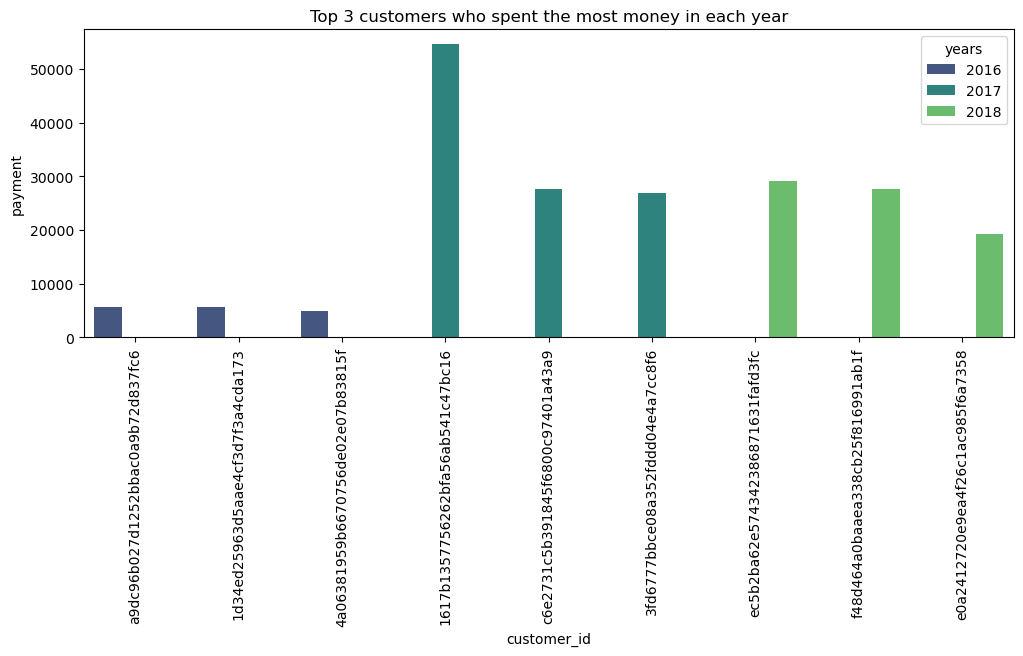

In [54]:
query = """ select years, customer_id, payment, d_rank
from
(select year(o.order_purchase_timestamp) years, o.customer_id, sum(p.payment_value) payment, dense_rank() 
over(partition by year(o.order_purchase_timestamp) 
order by sum(p.payment_value) desc) d_rank
from orders as o join payments as p on p.order_id = o.order_id
group by years, o.customer_id) as a
where d_rank <= 3"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["years","customer_id","payment","rank"])

df["years"] = df["years"].astype(str)

plt.figure(figsize = (12,4))
plt.title("Top 3 customers who spent the most money in each year")
ax = sns.barplot(x = "customer_id", y = "payment", data = df, hue = "years", palette = "viridis")
plt.xticks(rotation = 90)

plt.show()

In [ ]:
# here we have completed our project and solved questions with Python + SQL.

#Thank You.